In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#import the data
heart = pd.read_csv("../data/heart_2020_cleaned.csv")

In [3]:
heart_cat = heart.select_dtypes(include="object")
#replace the target variable with 1's and 0's
heart["HeartDisease"] = heart["HeartDisease"].replace({"No": 0, "Yes": 1})
heart_dumm = pd.get_dummies(heart)
#Create two variable to define the target and the features
y = heart_dumm["HeartDisease"]
X = heart_dumm.drop("HeartDisease", axis=1)

#user scaling transformation MinMax to convert the range of the 4 variables betwee 0,1 and replace with these new scaled variables
X_scaler = X[["BMI","PhysicalHealth","MentalHealth","SleepTime"]]
scaler = preprocessing.MinMaxScaler().fit(X_scaler)
X_scaled = scaler.transform(X_scaler)
X_scaled = pd.DataFrame(X_scaled, columns = ["BMI","PhysicalHealth","MentalHealth","SleepTime"])
X = X.drop(["BMI","PhysicalHealth","MentalHealth","SleepTime"], axis=1)
X = pd.concat([X, X_scaled], axis = 1)

In [4]:
X

,Smoking_No,Smoking_Yes,AlcoholDrinking_No,AlcoholDrinking_Yes,Stroke_No,Stroke_Yes,DiffWalking_No,DiffWalking_Yes,Sex_Female,Sex_Male,...,Asthma_No,Asthma_Yes,KidneyDisease_No,KidneyDisease_Yes,SkinCancer_No,SkinCancer_Yes,BMI,PhysicalHealth,MentalHealth,SleepTime
0,0,1,1,0,1,0,1,0,1,0,...,0,1,1,0,0,1,0.055294,0.100000,1.0,0.173913
1,1,0,1,0,0,1,1,0,1,0,...,1,0,1,0,1,0,0.100447,0.000000,0.0,0.260870
2,0,1,1,0,1,0,1,0,0,1,...,0,1,1,0,1,0,0.175782,0.666667,1.0,0.304348
3,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,0,1,0.147169,0.000000,0.0,0.217391
4,1,0,1,0,1,0,0,1,1,0,...,1,0,1,0,1,0,0.141132,0.933333,0.0,0.304348
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,0,1,1,0,1,0,0,1,0,1,...,0,1,1,0,1,0,0.185802,0.233333,0.0,0.217391
319791,0,1,1,0,1,0,1,0,0,1,...,0,1,1,0,1,0,0.215139,0.000000,0.0,0.173913
319792,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0.147531,0.000000,0.0,0.217391
319793,1,0,1,0,1,0,1,0,1,0,...,1,0,1,0,1,0,0.250996,0.000000,0.0,0.478261


In [5]:
y

0         0
1         0
2         0
3         0
4         0
         ..
319790    1
319791    0
319792    0
319793    0
319794    0
Name: HeartDisease, Length: 319795, dtype: int64

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2022, stratify=y)

In [17]:
log_model = LogisticRegression(class_weight="balanced")
#Fit and train the model on the training dataset
log_model.fit(X_train, y_train)
#Predict the output on the test dataset
y_test_pred = log_model.predict_proba(X_test)[::, 1]
print(y_test_pred)
#Model Evaluation using AUC ROC metric on the t
auc = roc_auc_score(y_test, y_test_pred)
print('Test data AUC-ROC %.3f', (auc))

[0.95080797 0.29822972 0.10134202 ... 0.69250385 0.38473847 0.15795327]
Test data AUC-ROC %.3f 0.841920492479854


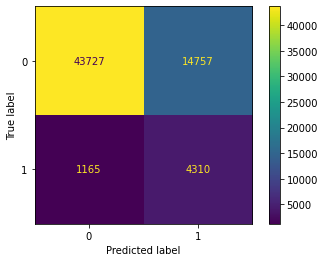

In [8]:
import numpy as num
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test) #display the confusion matrix
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC:  0.841920492479854


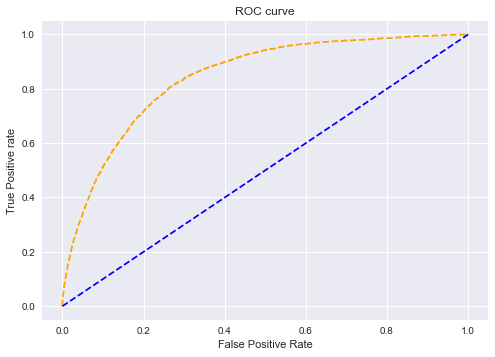

In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

auc = roc_auc_score(y_test, y_test_pred) # calculate the auc roc score
print("AUC: ", auc)
# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, y_test_pred, pos_label=1) #function to create the roc curve

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))] #random variable
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1) #plot actual values vs random predictions
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange') #plot false positive rate vs true positive rate
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue') 
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [10]:
!pip3 install imblearn

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


In [11]:
import numpy as np

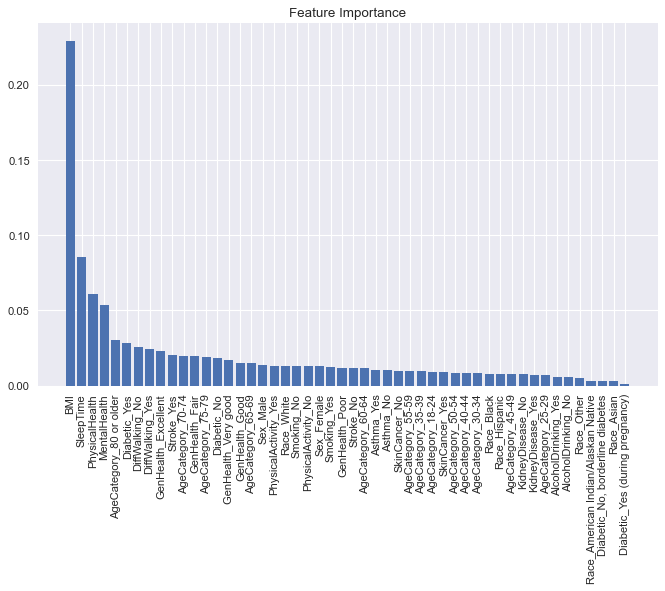

In [12]:
from imblearn.ensemble import BalancedRandomForestClassifier
clf_bal = BalancedRandomForestClassifier() #calling the model
clf_bal.fit(X_train,y_train) #fit the data to the model
importances = clf_bal.feature_importances_ #call the feature importance function
sorted_indices = np.argsort(importances)[::-1]

#plot the feature importanct chart
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80) 
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split, KFold, GridSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

/usr/local/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [ ]:
from sklearn.metrics import precision_score,recall_score,roc_auc_score

In [18]:
models = [KNeighborsClassifier(), LogisticRegression(), XGBClassifier()]

scores = dict()

for m in models:
    # 训练
    m.fit(X_train, y_train)
    # 预测
    y_pred = m.predict(X_test)
    print(y_test_pred)
    # 评估
    print(f'model: {str(m)}')
    print(f'Accuracy_score: {accuracy_score(y_test,y_pred)}')
    print(f'Precission_score: {precision_score(y_test,y_pred)}')
    print(f'Recall_score: {recall_score(y_test,y_pred)}')
    print(f'F1-score: {f1_score(y_test,y_pred)}')
    print('-'*30, '\n')
    print((y_test, y_pred))

[0.95080797 0.29822972 0.10134202 ... 0.69250385 0.38473847 0.15795327]
model: KNeighborsClassifier()
Accuracy_score: 0.9067840335214747
Precission_score: 0.37570188871873406
Recall_score: 0.13442922374429223
F1-score: 0.1980091471616895
------------------------------ 

(9111      0
142167    0
184481    0
69282     0
242274    0
         ..
176481    0
137527    0
222520    1
102361    0
104957    0
Name: HeartDisease, Length: 63959, dtype: int64, array([1, 0, 0, ..., 0, 0, 0]))
[0.95080797 0.29822972 0.10134202 ... 0.69250385 0.38473847 0.15795327]
model: LogisticRegression()
Accuracy_score: 0.9163370284088244
Precission_score: 0.5616302186878728
Recall_score: 0.10319634703196347
F1-score: 0.17435580928869002
------------------------------ 

(9111      0
142167    0
184481    0
69282     0
242274    0
         ..
176481    0
137527    0
222520    1
102361    0
104957    0
Name: HeartDisease, Length: 63959, dtype: int64, array([1, 0, 0, ..., 0, 0, 0]))


/usr/local/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/usr/local/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[07:53:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[0.95080797 0.29822972 0.10134202 ... 0.69250385 0.38473847 0.15795327]
model: XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None

([<matplotlib.patches.Wedge at 0x1346aefd0>,
 [Text(-0.6465637441936393, 0.8899187180267096, 'train_set'),
  Text(0.6465637441936392, -0.8899187180267097, 'test_set')])

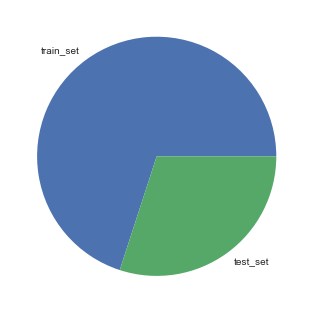

In [19]:
# 简单画pie
plt.pie(x=[0.7,0.3], labels=['train_set', 'test_set' ])